In [4]:
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
import matplotlib.pyplot as plt

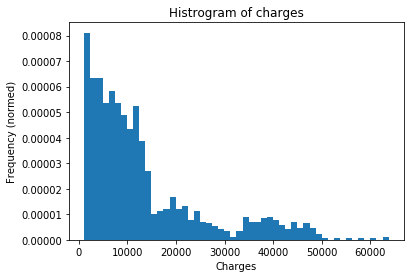

In [12]:
df.charges.plot.hist(bins = 50, normed = True)
plt.title("Histrogram of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency (normed)");

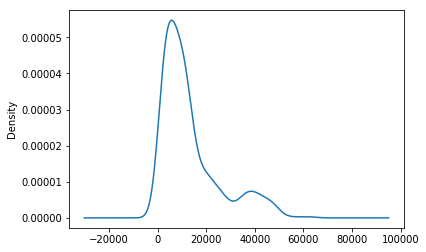

In [7]:
df.charges.plot.density()